# Task 3

# Imports

In [1]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})
## add any other additional packages that you need. You are free to use any packages for vizualization.

## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

## Step 1: Read the data from S3

In [2]:
df = pd.read_csv("s3://mds-s3-001/output/ml_data_SYD.csv", index_col=0, parse_dates=True)

In [3]:
#df = pd.read_csv("ml_data_SYD.csv", index_col=0, parse_dates=True)

In [4]:
df.shape

(46020, 26)

In [5]:
df.head()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,observed_rainfall
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,35.579336,4.268112e+00,1.107466e-03,11.410537,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,0.006612
1889-01-02,0.073777,0.303965,4.596520,1.190141e+00,1.015323e-04,4.014984,1.312700e+00,0.946211,2.788724,4.771375,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,3.675510e-01,4.350863e-01,0.477231,3.757179,2.287381,0.090422
1889-01-03,0.232656,0.019976,5.927467,1.003845e-09,1.760345e-05,9.660565,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,1.401452
1889-01-04,0.911319,13.623777,8.029624,8.225225e-02,1.808932e-01,3.951528,1.317160e+01,0.368693,0.013578,15.252495,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472226e-07,5.301038e-01,0.002699,2.185454,2.106737,14.869798
1889-01-05,0.698013,0.021048,2.132686,2.496841e+00,4.708019e-09,2.766362,1.822940e+01,0.339267,0.002468,11.920356,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,0.467628


## Step 2: Drop rows with nans

In [6]:
df = df.dropna()

df.shape

(45989, 26)

## Step 3: Train test Split

In [7]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

X_train, y_train = train_df.drop(columns="observed_rainfall"), train_df["observed_rainfall"]
X_test, y_test = test_df.drop(columns="observed_rainfall"), test_df["observed_rainfall"]

## Step 4: EDA and observations

In [8]:
train_df.shape

(36791, 26)

**Observation:**

There are 36,791 data in the train data frame, and there are 25 features (individual models) for predicting rainfalls in Sidney. And there is one target, which is the observed rainfall

In [9]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ACCESS-CM2,36791.0,2.429419,6.791374,0.000000e+00,5.410842e-02,0.192980,1.445456,149.967634
ACCESS-ESM1-5,36791.0,2.938955,7.048794,0.000000e+00,2.124827e-02,0.492758,2.398539,157.605713
AWI-ESM-1-1-LR,36791.0,3.716329,7.280859,9.161142e-14,2.961787e-02,0.592315,3.601697,89.465749
BCC-CSM2-MR,36791.0,2.203086,6.518224,4.211430e-24,5.089918e-04,0.096441,1.318940,134.465223
BCC-ESM1,36791.0,2.748441,5.997439,1.091904e-24,2.381995e-03,0.298651,2.477893,87.134722
CMCC-CM2-HR4,36791.0,3.092784,6.459254,0.000000e+00,1.383154e-01,0.633548,3.182630,124.952390
CMCC-CM2-SR5,36791.0,3.575203,7.353451,-4.503054e-17,8.899328e-02,0.827889,3.727703,140.147801
CMCC-ESM2,36791.0,3.489756,7.039201,-3.186177e-19,9.271159e-02,0.848624,3.629963,137.591559
CanESM5,36791.0,2.879339,6.898890,0.000000e+00,2.249343e-02,0.337613,2.558854,135.569753
EC-Earth3-Veg-LR,36791.0,2.565430,5.732742,-9.934637e-19,1.201630e-02,0.429678,2.295852,96.423818


**Observation:**

Across different models, the predicted rainfall has similar mean values and standard deviations. Also, all minimum values are quite close to 0. However, the maximum values varies a lot between different models as some models give around 167, while other models return as low as 74. 

In [10]:
train_df.loc[:, train_df.columns != 'observed_rainfall'].mean()

ACCESS-CM2          2.429419
ACCESS-ESM1-5       2.938955
AWI-ESM-1-1-LR      3.716329
BCC-CSM2-MR         2.203086
BCC-ESM1            2.748441
CMCC-CM2-HR4        3.092784
CMCC-CM2-SR5        3.575203
CMCC-ESM2           3.489756
CanESM5             2.879339
EC-Earth3-Veg-LR    2.565430
FGOALS-g3           1.735850
GFDL-CM4            1.804218
INM-CM4-8           3.859644
INM-CM5-0           4.078760
KIOST-ESM           1.683288
MIROC6              3.117144
MPI-ESM-1-2-HAM     3.213535
MPI-ESM1-2-HR       1.299377
MPI-ESM1-2-LR       2.041242
MRI-ESM2-0          1.533212
NESM3               1.726792
NorESM2-LM          2.458268
NorESM2-MM          2.890478
SAM0-UNICON         3.383557
TaiESM1             3.417809
dtype: float64

**Observations:**

I took the average of predicted rainfall for different models. As we can see above, model INM-CM5-0 returns the highest average amount of rainfall, while model MPI-ESM1-2-HR returns the lowest average amount of rainfall.

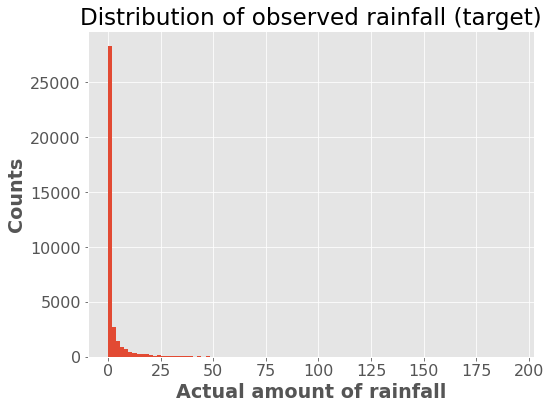

In [11]:
plt.hist(train_df['observed_rainfall'], bins = 100)
plt.xlabel('Actual amount of rainfall')
plt.ylabel('Counts')
plt.title('Distribution of observed rainfall (target)');

**Observation:**

This is a significantly right-skewed distribution. It illustrates that Sidney barely rain as 0 observed rainfall is the most common instance and 0 observed rainfall accounts for much higher proportion than other amounts of rainfall. It may indicate that individual models may predict no rainfall much more frequent than other numbers of amount. 

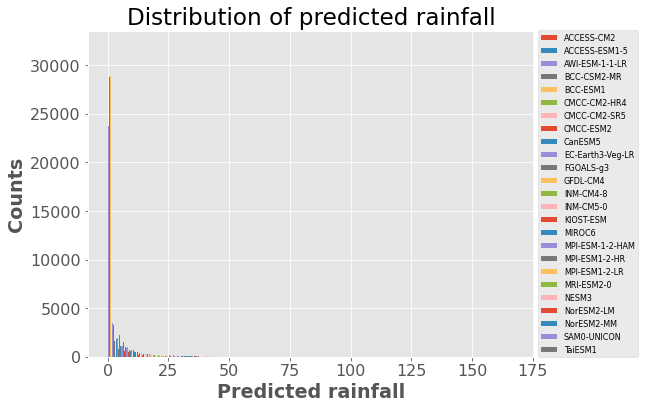

In [12]:
plt.hist(train_df.loc[:, train_df.columns != 'observed_rainfall'], bins = 100)
plt.legend(train_df.loc[:, train_df.columns != 'observed_rainfall'].columns.values.tolist(),
           loc='center left', 
           bbox_to_anchor=(1, 0.5), 
           prop={'size': 8})
plt.xlabel('Predicted rainfall')
plt.ylabel('Counts')
plt.title('Distribution of predicted rainfall');

**Observation:**

As we guessed before, individual models predict 0 amount of rainfall as the most frequent answer.

## Step 5: Train and evaluate the machine learning model

In [13]:
model_untuned = RandomForestRegressor(random_state=123)
model_untuned.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [14]:
data = {'Model': ['Ensembled Model'], 'RMSE': [mean_squared_error(y_test, model_untuned.predict(X_test), squared=False)]} 

result_df = pd.DataFrame(data).reset_index(drop=True)

result_df

,Model,RMSE
0,Ensembled Model,8.860048


## Step 6: Discuss results

In [15]:
all_results = {}

for col in X_test.columns:
    RMSE = mean_squared_error(y_test, X_test[col], squared=False)
    all_results[col] = RMSE

model_results_df = pd.DataFrame(all_results.values(), index=all_results.keys(), columns=['RMSE']).sort_values('RMSE', ascending=False)

model_results_df

,RMSE
INM-CM5-0,12.250223
SAM0-UNICON,11.678749
TaiESM1,11.528083
CMCC-CM2-SR5,11.480614
INM-CM4-8,11.451635
MIROC6,11.352976
CMCC-ESM2,11.246493
CanESM5,11.151318
ACCESS-CM2,11.038999
AWI-ESM-1-1-LR,10.996616


**Observation:**

In order to make sure the number of instances are equal for comparison purpose, I used the test data frame to calculate the RMSE for each individual model. By comparing the RMSE of our trained ensembled regressor with individual model's performance, we can conclude that our model outperforms all individual models as our ensembled model's RMSE is the lowest one. 

## Part 2:

### Preparation for deploying model next week

***NOTE: Complete task 4 from the milestone3 before coming here***

We’ve found the best hyperparameter settings with MLlib (from the task 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [16]:
model = RandomForestRegressor(n_estimators=___, max_depth=___)
model.fit(X_train, y_train)

ValueError: n_estimators must be an integer, got <class 'sklearn.ensemble._forest.RandomForestRegressor'>.

In [ ]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

In [ ]:
# ready to deploy
dump(model, "model.joblib")

***Upload model.joblib to s3 under output folder. You choose how you want to upload it (using CLI, SDK, or web console).***